In [35]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
# Connect to the SQL database
conn = psycopg2.connect(
    host="",
    port="",
    database="",
    user="",
    password=""
)

# List of Big 10 opponents
big10_opponents = ["Michigan", "Ohio State", "Penn State", "Michigan State", "Iowa", "Indiana", 
                   "Rutgers", "Maryland", "Purdue", "Illinois", "Minnesota", "Nebraska", 
                   "Northwestern", "Wisconsin"]

# Query for UCLA
ucla_query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, rushing_att, rushing_yds, 
       rushing_avg, rushing_td, total_plays, total_yards, avg_yds, pass_first_downs, rush_first_downs,
       first_down_pens, total_first_downs, total_penalties, total_penalties_yds, total_fum, total_int, 
       total_to, result
FROM UCLA_Offensive_Stats;
"""
ucla_data = pd.read_sql(ucla_query, conn)
ucla_data['is_big10'] = ucla_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)
ucla_data['team'] = 'UCLA'

# Query for USC
usc_query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, rushing_att, rushing_yds, 
       rushing_avg, rushing_td, total_plays, total_yards, avg_yds, pass_first_downs, rush_first_downs,
       first_down_pens, total_first_downs, total_penalties, total_penalties_yds, total_fum, total_int, 
       total_to, result
FROM USC_Offensive_Stats;
"""
usc_data = pd.read_sql(usc_query, conn)
usc_data['is_big10'] = usc_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)
usc_data['team'] = 'USC'

# Query for Washington
washington_query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, rushing_att, rushing_yds, 
       rushing_avg, rushing_td, total_plays, total_yards, avg_yds, pass_first_downs, rush_first_downs,
       first_down_pens, total_first_downs, total_penalties, total_penalties_yds, total_fum, total_int, 
       total_to, result
FROM Washington_Offensive_Stats;
"""
washington_data = pd.read_sql(washington_query, conn)
washington_data['is_big10'] = washington_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)
washington_data['team'] = 'Washington'

# Query for Oregon
oregon_query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, rushing_att, rushing_yds, 
       rushing_avg, rushing_td, total_plays, total_yards, avg_yds, pass_first_downs, rush_first_downs,
       first_down_pens, total_first_downs, total_penalties, total_penalties_yds, total_fum, total_int, 
       total_to, result
FROM Oregon_Offensive_Stats;
"""
oregon_data = pd.read_sql(oregon_query, conn)
oregon_data['is_big10'] = oregon_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)
oregon_data['team'] = 'Oregon'

# Combine the data for all teams
combined_performance = pd.concat([ucla_data, usc_data, washington_data, oregon_data], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_performance.head())


# Check for missing values
print(combined_performance.isnull().sum())

# Fill missing numeric values with 0
combined_performance.fillna(0, inplace=True)

# Ensure that numerical columns are of the correct data type
numeric_columns = ['passing_cmp', 'passing_att', 'passing_yds', 'passing_td', 
                   'rushing_att', 'rushing_yds', 'rushing_td', 'total_yards', 
                   'total_first_downs', 'total_penalties_yds', 'total_fum', 
                   'total_int', 'total_to']

combined_performance[numeric_columns] = combined_performance[numeric_columns].apply(pd.to_numeric)




print(combined_performance.dtypes)


         date raw_location             opponent  passing_cmp  passing_att  \
0  2022-10-22            @               Oregon           27           39   
1  2022-10-29            H             Stanford           18           29   
2  2022-11-05            @        Arizona State           13           20   
3  2022-11-12            H              Arizona           26           39   
4  2022-11-19            H  Southern California           23           38   

   completion_pct  passing_yds  passing_td  rushing_att  rushing_yds  ...  \
0            69.2          262           2           30          186  ...   
1            62.1          199           0           45          324  ...   
2            65.0          169           2           42          402  ...   
3            66.7          245           1           37          219  ...   
4            60.5          309           4           37          204  ...   

   first_down_pens  total_first_downs  total_penalties  total_penalties_yd

In [36]:
# Create a new column 'win' that is 1 for a win and 0 for a loss
combined_performance['win'] = combined_performance['result'].apply(lambda x: 1 if x.strip()[0] == 'W' else 0)

# Verify the new column
print(combined_performance[['result', 'win']].head())


      result  win
0  L (30-45)    0
1  W (38-13)    1
2  W (50-36)    1
3  L (28-34)    0
4  L (45-48)    0


In [37]:
# Calculate win percentage for Big 10 teams
big10_games = combined_performance[combined_performance['is_big10'] == 1]
non_big10_games = combined_performance[combined_performance['is_big10'] == 0]

big10_win_pct = big10_games['win'].mean() * 100
non_big10_win_pct = non_big10_games['win'].mean() * 100

print(f"Win Percentage vs. Big 10 Teams: {big10_win_pct:.2f}%")
print(f"Win Percentage vs. Other Teams: {non_big10_win_pct:.2f}%")


Win Percentage vs. Big 10 Teams: 76.92%
Win Percentage vs. Other Teams: 64.99%


In [38]:
# Calculate average offensive stats for Big 10 teams
big10_offensive_stats = big10_games[['passing_cmp', 'passing_att', 'passing_yds', 'passing_td', 
                                     'rushing_att', 'rushing_yds', 'rushing_td', 'total_yards', 
                                     'total_first_downs', 'total_penalties_yds', 'total_fum', 
                                     'total_int', 'total_to']].mean()

# Calculate average offensive stats for non-Big 10 teams
non_big10_offensive_stats = non_big10_games[['passing_cmp', 'passing_att', 'passing_yds', 'passing_td', 
                                             'rushing_att', 'rushing_yds', 'rushing_td', 'total_yards', 
                                             'total_first_downs', 'total_penalties_yds', 'total_fum', 
                                             'total_int', 'total_to']].mean()

print("Offensive Statistics vs. Big 10 Teams:")
print(big10_offensive_stats)
print("\nOffensive Statistics vs. Other Teams:")
print(non_big10_offensive_stats)


Offensive Statistics vs. Big 10 Teams:
passing_cmp             20.384615
passing_att             31.923077
passing_yds            309.846154
passing_td               2.307692
rushing_att             40.615385
rushing_yds            179.846154
rushing_td               1.846154
total_yards            489.692308
total_first_downs       23.230769
total_penalties_yds     69.769231
total_fum                0.384615
total_int                0.461538
total_to                 0.846154
dtype: float64

Offensive Statistics vs. Other Teams:
passing_cmp             21.577281
passing_att             33.314711
passing_yds            270.130354
passing_td               2.115456
rushing_att             37.575419
rushing_yds            180.577281
rushing_td               2.080074
total_yards            450.707635
total_first_downs       23.070764
total_penalties_yds     62.221601
total_fum                0.605214
total_int                0.726257
total_to                 1.331471
dtype: float64


In [39]:
ucla_def_query = """
SELECT date, location, opponent, 
       opponent_total_yards AS total_yards_allowed, opponent_passing_yds AS passing_yds_allowed, 
       opponent_rushing_yds AS rushing_yds_allowed
FROM UCLA_Defensive_Stats;
"""
ucla_def_data = pd.read_sql(ucla_def_query, conn)
ucla_def_data['is_big10'] = ucla_def_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)

# Query for USC Defensive Stats
usc_def_query = """
SELECT date, location, opponent, 
       opponent_total_yards AS total_yards_allowed, opponent_passing_yds AS passing_yds_allowed, 
       opponent_rushing_yds AS rushing_yds_allowed
FROM USC_Defensive_Stats;
"""
usc_def_data = pd.read_sql(usc_def_query, conn)
usc_def_data['is_big10'] = usc_def_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)

# Query for Washington Defensive Stats
uw_def_query = """
SELECT date, location, opponent, 
       opponent_total_yards AS total_yards_allowed, opponent_passing_yds AS passing_yds_allowed, 
       opponent_rushing_yds AS rushing_yds_allowed
FROM Washington_Defensive_Stats;
"""
uw_def_data = pd.read_sql(uw_def_query, conn)
uw_def_data['is_big10'] = uw_def_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)

# Query for Oregon Defensive Stats
oregon_def_query = """
SELECT date, location, opponent, 
       opponent_total_yards AS total_yards_allowed, opponent_passing_yds AS passing_yds_allowed, 
       opponent_rushing_yds AS rushing_yds_allowed
FROM Oregon_Defensive_Stats;
"""
oregon_def_data = pd.read_sql(oregon_def_query, conn)
oregon_def_data['is_big10'] = oregon_def_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)

# Combine the defensive data for all teams
combined_defensive = pd.concat([ucla_def_data, usc_def_data, uw_def_data, oregon_def_data], ignore_index=True)

# Calculate average defensive stats for Big 10 teams
big10_defensive_stats = combined_defensive[combined_defensive['is_big10'] == 1][['total_yards_allowed', 'passing_yds_allowed', 'rushing_yds_allowed']].mean()

# Calculate average defensive stats for non-Big 10 teams
non_big10_defensive_stats = combined_defensive[combined_defensive['is_big10'] == 0][['total_yards_allowed', 'passing_yds_allowed', 'rushing_yds_allowed']].mean()

print("Defensive Statistics vs. Big 10 Teams:")
print(big10_defensive_stats)
print("\nDefensive Statistics vs. Other Teams:")
print(non_big10_defensive_stats)

Defensive Statistics vs. Big 10 Teams:
total_yards_allowed    376.230769
passing_yds_allowed    235.769231
rushing_yds_allowed    140.461538
dtype: float64

Defensive Statistics vs. Other Teams:
total_yards_allowed    387.972067
passing_yds_allowed    236.549348
rushing_yds_allowed    151.422719
dtype: float64


<Figure size 1000x600 with 0 Axes>

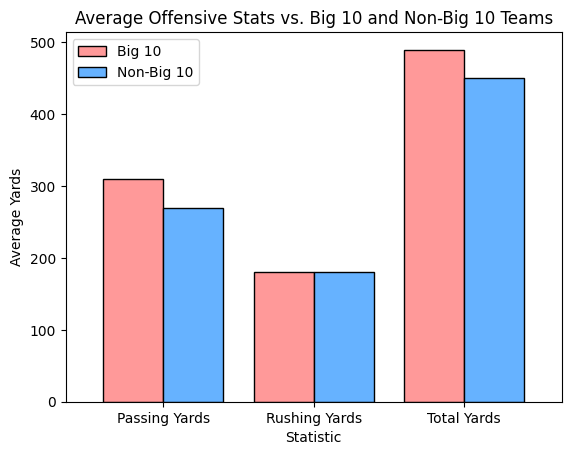

In [40]:
# Ensure the correct calculation of offensive stats
offensive_stats_df = pd.DataFrame({
    'Stat': ['Passing Yards', 'Rushing Yards', 'Total Yards'],
    'Big 10': big10_games[['passing_yds', 'rushing_yds', 'total_yards']].mean().values,
    'Non-Big 10': non_big10_games[['passing_yds', 'rushing_yds', 'total_yards']].mean().values
})

# Plotting the corrected offensive stats
plt.figure(figsize=(10, 6))
offensive_stats_df.plot(kind='bar', x='Stat', color=['#FF9999', '#66B2FF'], edgecolor='black', width=0.8)
plt.title('Average Offensive Stats vs. Big 10 and Non-Big 10 Teams')
plt.ylabel('Average Yards')
plt.xlabel('Statistic')
plt.xticks(rotation=0)
plt.legend(['Big 10', 'Non-Big 10'])
plt.show()


<Figure size 1000x600 with 0 Axes>

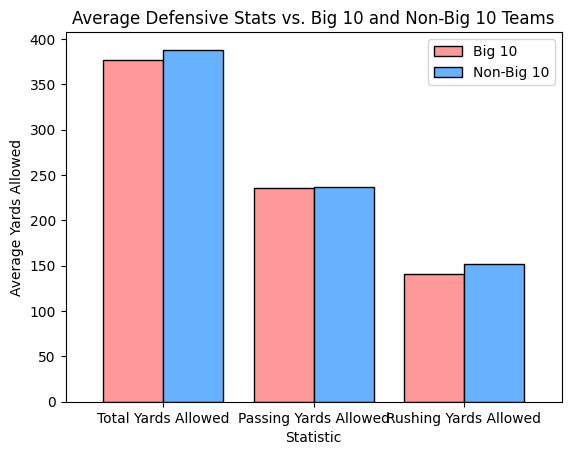

In [41]:
# Calculate average defensive stats for Big 10 and non-Big 10 opponents
defensive_stats_big10 = big10_defensive_stats
defensive_stats_non_big10 = non_big10_defensive_stats

# Create a DataFrame for plotting
defensive_stats_df = pd.DataFrame({
    'Stat': ['Total Yards Allowed', 'Passing Yards Allowed', 'Rushing Yards Allowed'],
    'Big 10': defensive_stats_big10.values,
    'Non-Big 10': defensive_stats_non_big10.values
})

# Plotting the defensive stats
plt.figure(figsize=(10, 6))
defensive_stats_df.plot(kind='bar', x='Stat', color=['#FF9999', '#66B2FF'], edgecolor='black', width=0.8)
plt.title('Average Defensive Stats vs. Big 10 and Non-Big 10 Teams')
plt.ylabel('Average Yards Allowed')
plt.xlabel('Statistic')
plt.xticks(rotation=0)
plt.legend(['Big 10', 'Non-Big 10'])
plt.show()


In [43]:
# Defense queries
ucla_def_query = """
SELECT date, location, opponent, 
       opponent_passing_cmp, opponent_passing_att, opponent_completion_pct, opponent_passing_yds, 
       opponent_passing_td, opponent_rushing_att, opponent_rushing_yds, opponent_rushing_avg, 
       opponent_rushing_td, opponent_total_plays, opponent_total_yards, opponent_avg_yds,
       opponent_pass_first_downs, opponent_rush_first_downs, opponent_first_down_pens, 
       opponent_total_first_downs, opponent_total_penalties, opponent_total_penalties_yds, 
       opponent_total_fum, opponent_total_int, opponent_total_to, temp_f, precipitation_in, 
       windspeed_mph, altitude_m, distance_from
FROM UCLA_Defensive_Stats;
"""
ucla_def_data = pd.read_sql(ucla_def_query, conn)
ucla_def_data['is_big10'] = ucla_def_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)

usc_def_query = """
SELECT date, location, opponent, 
       opponent_passing_cmp, opponent_passing_att, opponent_completion_pct, opponent_passing_yds, 
       opponent_passing_td, opponent_rushing_att, opponent_rushing_yds, opponent_rushing_avg, 
       opponent_rushing_td, opponent_total_plays, opponent_total_yards, opponent_avg_yds,
       opponent_pass_first_downs, opponent_rush_first_downs, opponent_first_down_pens, 
       opponent_total_first_downs, opponent_total_penalties, opponent_total_penalties_yds, 
       opponent_total_fum, opponent_total_int, opponent_total_to, temp_f, precipitation_in, 
       windspeed_mph, altitude_m, distance_from
FROM USC_Defensive_Stats;
"""
usc_def_data = pd.read_sql(usc_def_query, conn)
usc_def_data['is_big10'] = usc_def_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)

uw_def_query = """
SELECT date, location, opponent, 
       opponent_passing_cmp, opponent_passing_att, opponent_completion_pct, opponent_passing_yds, 
       opponent_passing_td, opponent_rushing_att, opponent_rushing_yds, opponent_rushing_avg, 
       opponent_rushing_td, opponent_total_plays, opponent_total_yards, opponent_avg_yds,
       opponent_pass_first_downs, opponent_rush_first_downs, opponent_first_down_pens, 
       opponent_total_first_downs, opponent_total_penalties, opponent_total_penalties_yds, 
       opponent_total_fum, opponent_total_int, opponent_total_to, temp_f, precipitation_in, 
       windspeed_mph, altitude_m, distance_from
FROM Washington_Defensive_Stats;
"""
uw_def_data = pd.read_sql(uw_def_query, conn)
uw_def_data['is_big10'] = uw_def_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)

oregon_def_query = """
SELECT date, location, opponent, 
       opponent_passing_cmp, opponent_passing_att, opponent_completion_pct, opponent_passing_yds, 
       opponent_passing_td, opponent_rushing_att, opponent_rushing_yds, opponent_rushing_avg, 
       opponent_rushing_td, opponent_total_plays, opponent_total_yards, opponent_avg_yds,
       opponent_pass_first_downs, opponent_rush_first_downs, opponent_first_down_pens, 
       opponent_total_first_downs, opponent_total_penalties, opponent_total_penalties_yds, 
       opponent_total_fum, opponent_total_int, opponent_total_to, temp_f, precipitation_in, 
       windspeed_mph, altitude_m, distance_from
FROM Oregon_Defensive_Stats;
"""
oregon_def_data = pd.read_sql(oregon_def_query, conn)
oregon_def_data['is_big10'] = oregon_def_data['opponent'].apply(lambda x: 1 if x in big10_opponents else 0)

# Combine the defensive data for all teams
combined_defensive = pd.concat([ucla_def_data, usc_def_data, uw_def_data, oregon_def_data], ignore_index=True)


In [44]:
# Group the data by Big 10 and non-Big 10 games for offensive stats
offensive_grouped = combined_performance.groupby('is_big10').agg({
    'passing_yds': 'mean',
    'rushing_yds': 'mean',
    'total_yards': 'mean',
    'completion_pct': 'mean',
    'passing_td': 'mean',
    'rushing_att': 'mean',
    'rushing_td': 'mean',
    'total_first_downs': 'mean',
    'total_to': 'mean'
}).reset_index()

# Rename the columns for clarity
offensive_grouped['Category'] = offensive_grouped['is_big10'].map({1: 'Big 10', 0: 'Non-Big 10'})

# Repeat for defensive stats
defensive_grouped = combined_defensive.groupby('is_big10').agg({
    'opponent_passing_yds': 'mean',
    'opponent_rushing_yds': 'mean',
    'opponent_total_yards': 'mean',
    'opponent_completion_pct': 'mean',
    'opponent_passing_td': 'mean',
    'opponent_rushing_att': 'mean',
    'opponent_rushing_td': 'mean',
    'opponent_total_first_downs': 'mean',
    'opponent_total_to': 'mean'
}).reset_index()

# Rename the columns for clarity
defensive_grouped['Category'] = defensive_grouped['is_big10'].map({1: 'Big 10', 0: 'Non-Big 10'})


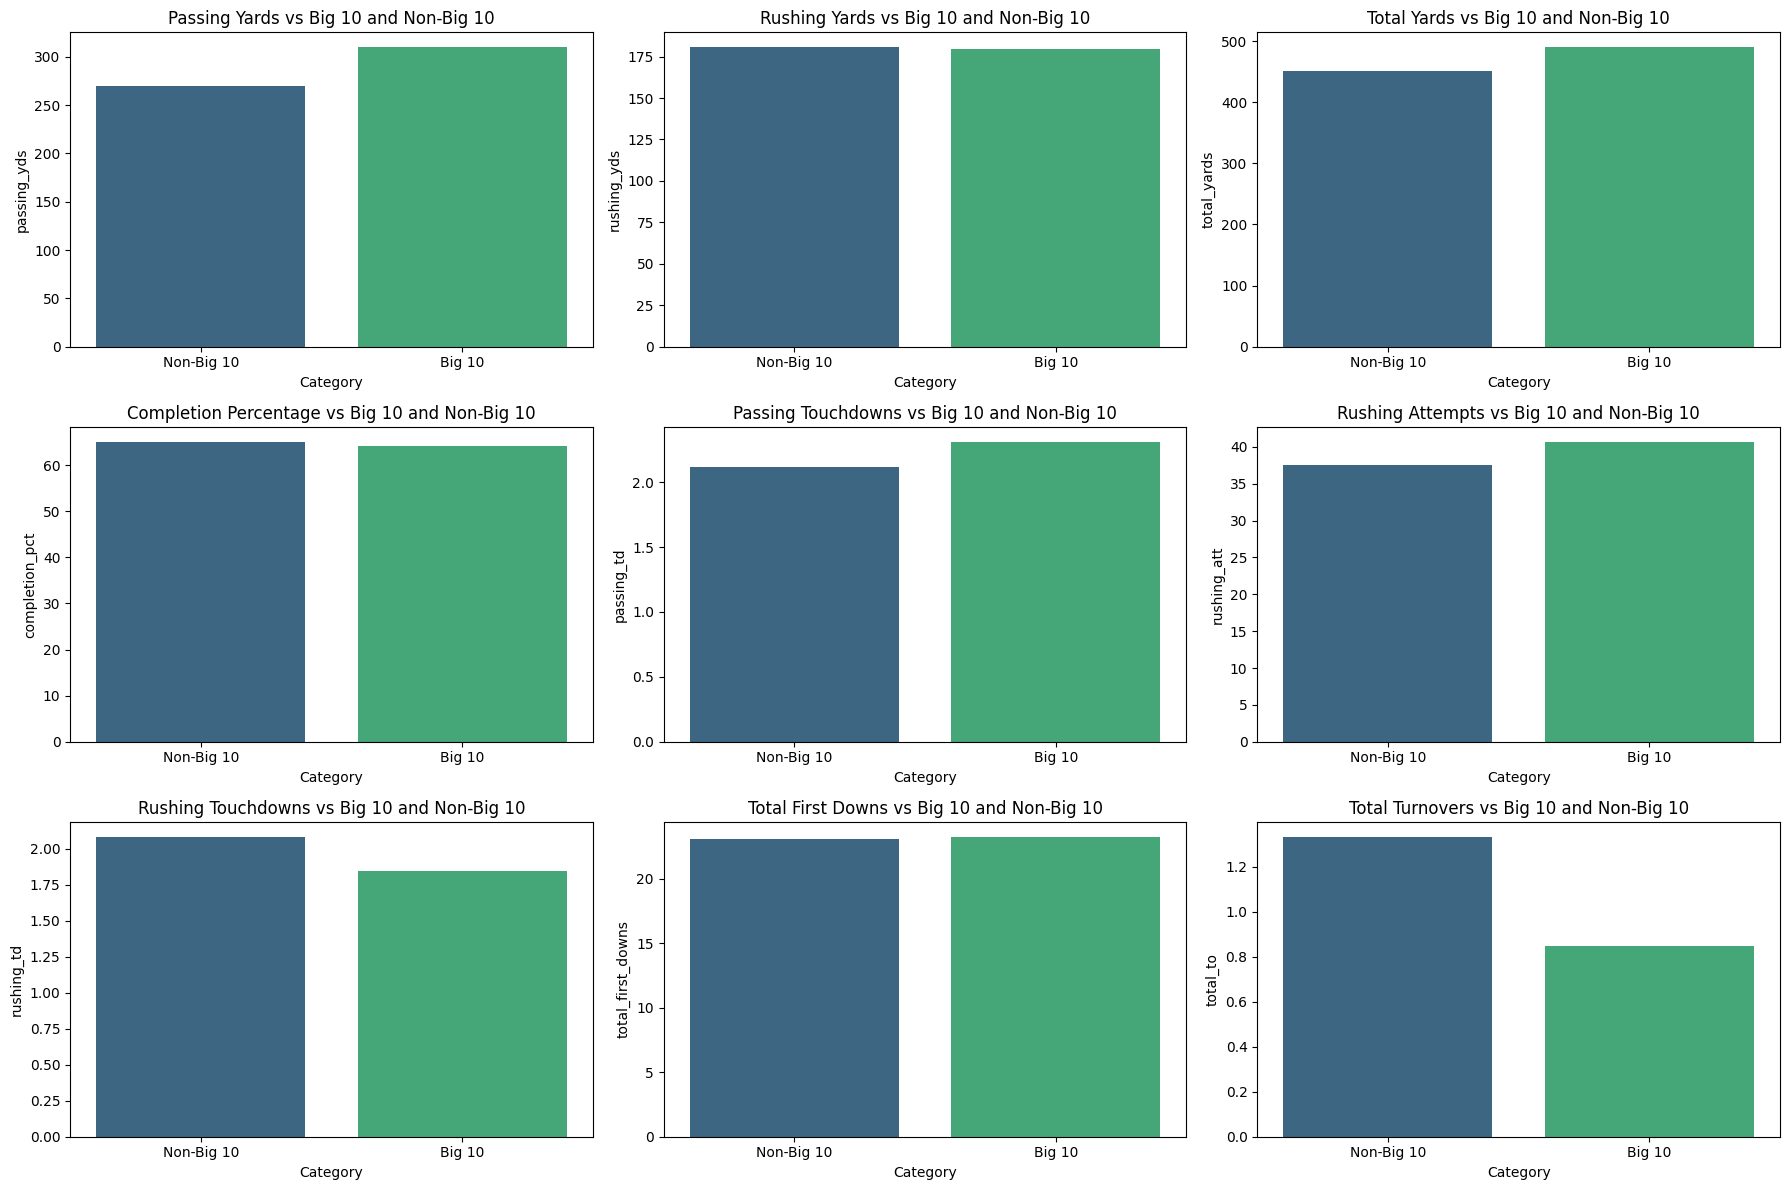

In [45]:
# Set up the plot
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Category', y='passing_yds', data=offensive_grouped, hue='Category', palette='viridis', ax=axs[0, 0], dodge=False)
axs[0, 0].set_title('Passing Yards vs Big 10 and Non-Big 10')

# Rushing Yards
sns.barplot(x='Category', y='rushing_yds', data=offensive_grouped, hue='Category', palette='viridis', ax=axs[0, 1], dodge=False)
axs[0, 1].set_title('Rushing Yards vs Big 10 and Non-Big 10')

# Total Yards
sns.barplot(x='Category', y='total_yards', data=offensive_grouped, hue='Category', palette='viridis', ax=axs[0, 2], dodge=False)
axs[0, 2].set_title('Total Yards vs Big 10 and Non-Big 10')

# Completion Percentage
sns.barplot(x='Category', y='completion_pct', data=offensive_grouped, hue='Category', palette='viridis', ax=axs[1, 0], dodge=False)
axs[1, 0].set_title('Completion Percentage vs Big 10 and Non-Big 10')

# Passing Touchdowns
sns.barplot(x='Category', y='passing_td', data=offensive_grouped, hue='Category', palette='viridis', ax=axs[1, 1], dodge=False)
axs[1, 1].set_title('Passing Touchdowns vs Big 10 and Non-Big 10')

# Rushing Attempts
sns.barplot(x='Category', y='rushing_att', data=offensive_grouped, hue='Category', palette='viridis', ax=axs[1, 2], dodge=False)
axs[1, 2].set_title('Rushing Attempts vs Big 10 and Non-Big 10')

# Rushing Touchdowns
sns.barplot(x='Category', y='rushing_td', data=offensive_grouped, hue='Category', palette='viridis', ax=axs[2, 0], dodge=False)
axs[2, 0].set_title('Rushing Touchdowns vs Big 10 and Non-Big 10')

# Total First Downs
sns.barplot(x='Category', y='total_first_downs', data=offensive_grouped, hue='Category', palette='viridis', ax=axs[2, 1], dodge=False)
axs[2, 1].set_title('Total First Downs vs Big 10 and Non-Big 10')

# Total Turnovers
sns.barplot(x='Category', y='total_to', data=offensive_grouped, hue='Category', palette='viridis', ax=axs[2, 2], dodge=False)
axs[2, 2].set_title('Total Turnovers vs Big 10 and Non-Big 10')

# Adjust layout
plt.tight_layout()
plt.show()


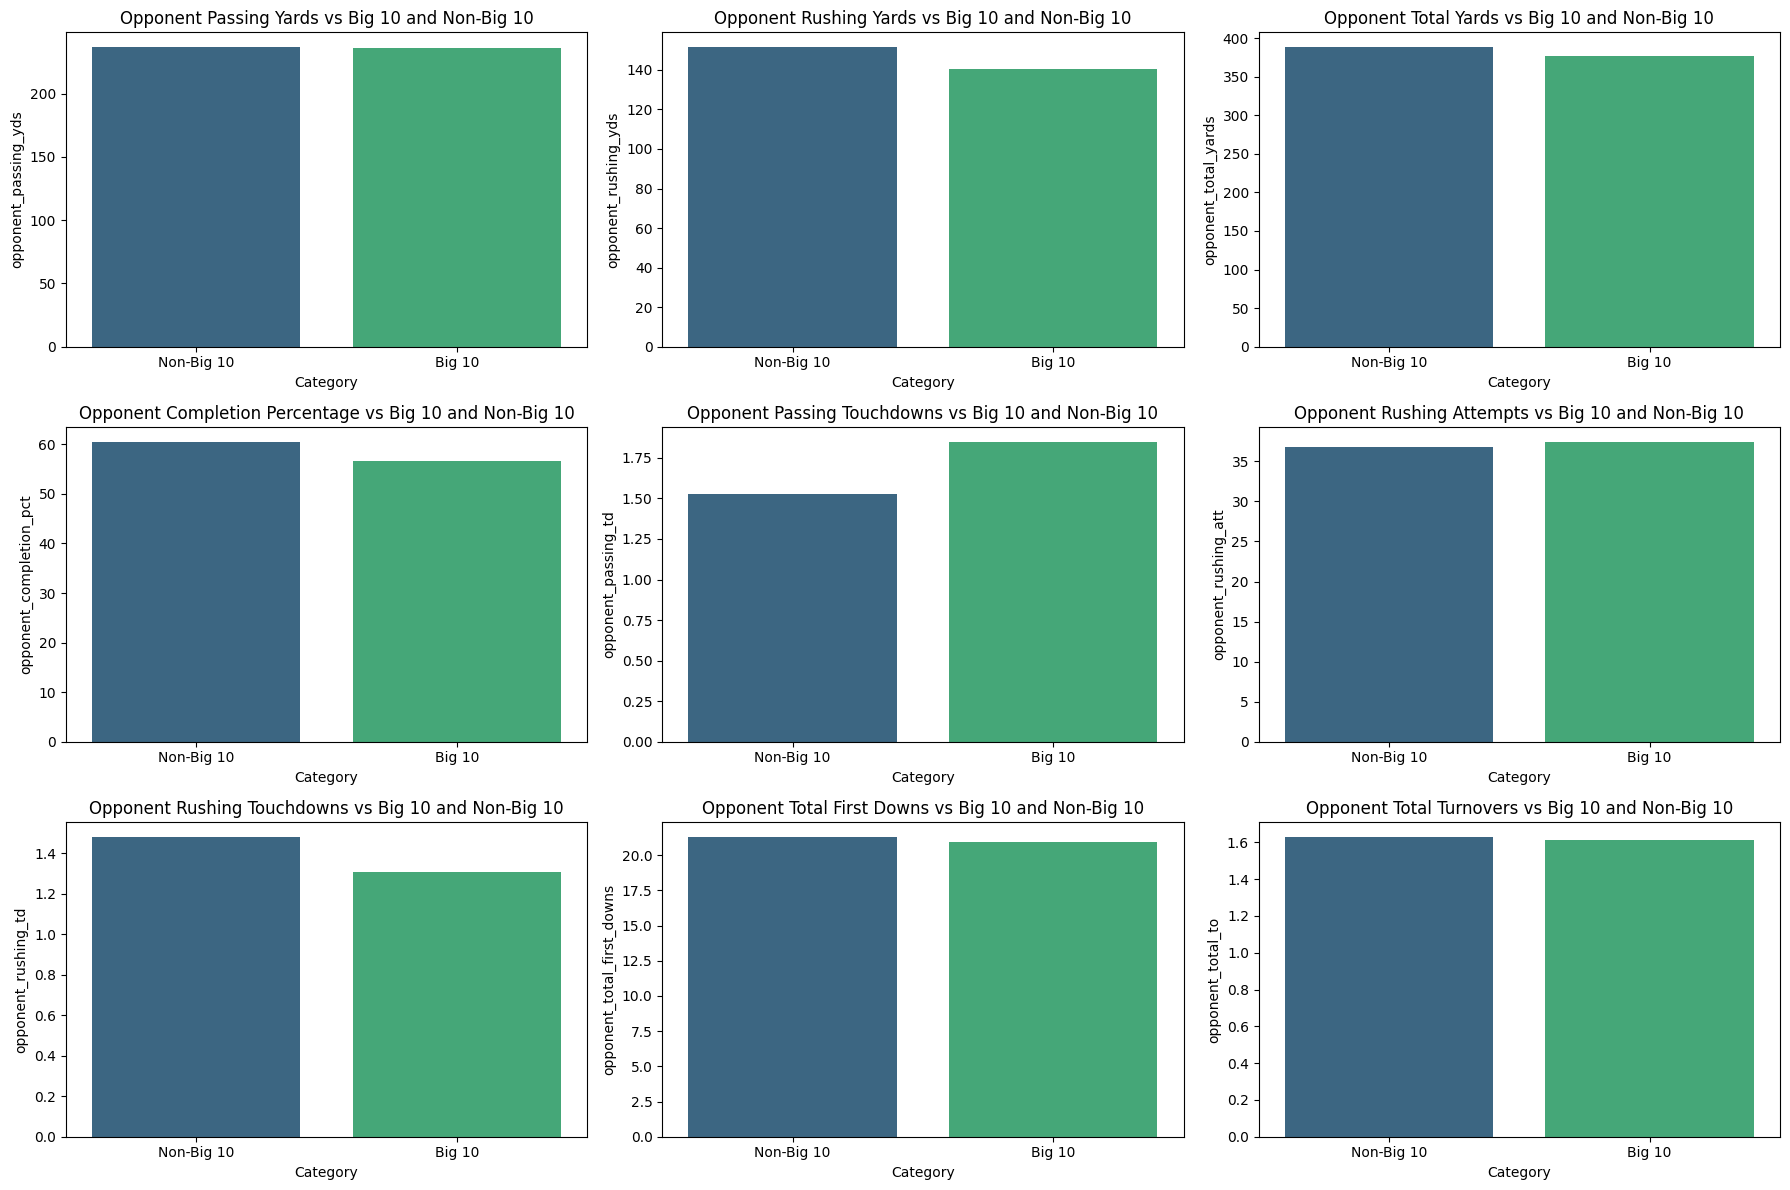

In [31]:
# Set up the plot
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Opponent Passing Yards
sns.barplot(x='Category', y='opponent_passing_yds', data=defensive_grouped, hue='Category', palette='viridis', ax=axs[0, 0], dodge=False)
axs[0, 0].set_title('Opponent Passing Yards vs Big 10 and Non-Big 10')

# Opponent Rushing Yards
sns.barplot(x='Category', y='opponent_rushing_yds', data=defensive_grouped, hue='Category', palette='viridis', ax=axs[0, 1], dodge=False)
axs[0, 1].set_title('Opponent Rushing Yards vs Big 10 and Non-Big 10')

# Opponent Total Yards
sns.barplot(x='Category', y='opponent_total_yards', data=defensive_grouped, hue='Category', palette='viridis', ax=axs[0, 2], dodge=False)
axs[0, 2].set_title('Opponent Total Yards vs Big 10 and Non-Big 10')

# Opponent Completion Percentage
sns.barplot(x='Category', y='opponent_completion_pct', data=defensive_grouped, hue='Category', palette='viridis', ax=axs[1, 0], dodge=False)
axs[1, 0].set_title('Opponent Completion Percentage vs Big 10 and Non-Big 10')

# Opponent Passing Touchdowns
sns.barplot(x='Category', y='opponent_passing_td', data=defensive_grouped, hue='Category', palette='viridis', ax=axs[1, 1], dodge=False)
axs[1, 1].set_title('Opponent Passing Touchdowns vs Big 10 and Non-Big 10')

# Opponent Rushing Attempts
sns.barplot(x='Category', y='opponent_rushing_att', data=defensive_grouped, hue='Category', palette='viridis', ax=axs[1, 2], dodge=False)
axs[1, 2].set_title('Opponent Rushing Attempts vs Big 10 and Non-Big 10')

# Opponent Rushing Touchdowns
sns.barplot(x='Category', y='opponent_rushing_td', data=defensive_grouped, hue='Category', palette='viridis', ax=axs[2, 0], dodge=False)
axs[2, 0].set_title('Opponent Rushing Touchdowns vs Big 10 and Non-Big 10')

# Opponent Total First Downs
sns.barplot(x='Category', y='opponent_total_first_downs', data=defensive_grouped, hue='Category', palette='viridis', ax=axs[2, 1], dodge=False)
axs[2, 1].set_title('Opponent Total First Downs vs Big 10 and Non-Big 10')

# Opponent Total Turnovers
sns.barplot(x='Category', y='opponent_total_to', data=defensive_grouped, hue='Category', palette='viridis', ax=axs[2, 2], dodge=False)
axs[2, 2].set_title('Opponent Total Turnovers vs Big 10 and Non-Big 10')

# Adjust layout
plt.tight_layout()
plt.show()
